# Create Latitude and Longitude Combinations
Add dependencies and generate latitudes and longitudes.

In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import requests
from scipy.stats import linregress
import gmaps

In [2]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import API key.
from config import weather_api_key
from config import g_key

In [3]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [4]:
# Import time module.
import time

In [5]:
# Starting URL for Weather Map API call.
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c4ab4bc962de3b8e723f4fbf4a08e5b3


In [6]:
# Create a set of random latitude and Longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
#Print the city count to confirm sufficient count.
len(cities)

631

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# loop thorugh all the citites in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
        
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate the Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cabiraoan
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | zabol
Processing Record 4 of Set 1 | camopi
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | port hedland
Processing Record 7 of Set 1 | van
Processing Record 8 of Set 1 | saldanha
Processing Record 9 of Set 1 | samusu
City not found. Skipping...
Processing Record 10 of Set 1 | kavaratti
Processing Record 11 of Set 1 | georgetown
Processing Record 12 of Set 1 | constanta
Processing Record 13 of Set 1 | neulengbach
Processing Record 14 of Set 1 | cherskiy
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | cape town
Processing Record 17 of Set 1 | saint george
Processing Record 18 of Set 1 | la asuncion
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | comodoro rivadavia
Processing Record 21 of Set 1 | atasu
Processing Record 22 of Set 1 | busselton
P

Processing Record 40 of Set 4 | buochs
Processing Record 41 of Set 4 | barahona
Processing Record 42 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 43 of Set 4 | semnan
Processing Record 44 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 45 of Set 4 | grand gaube
Processing Record 46 of Set 4 | varadero
Processing Record 47 of Set 4 | san patricio
Processing Record 48 of Set 4 | maningrida
Processing Record 49 of Set 4 | valdivia
Processing Record 50 of Set 4 | iqaluit
Processing Record 1 of Set 5 | borlange
City not found. Skipping...
Processing Record 2 of Set 5 | eucaliptus
Processing Record 3 of Set 5 | wasilla
Processing Record 4 of Set 5 | isangel
Processing Record 5 of Set 5 | mitsamiouli
Processing Record 6 of Set 5 | komsomolskiy
Processing Record 7 of Set 5 | temaraia
City not found. Skipping...
Processing Record 8 of Set 5 | hasaki
Processing Record 9 of Set 5 | trinidad
Processing Record 10 of Set 5 | richards bay
Processing Record 

Processing Record 26 of Set 8 | masuguru
Processing Record 27 of Set 8 | neuquen
Processing Record 28 of Set 8 | kieta
Processing Record 29 of Set 8 | beringovskiy
Processing Record 30 of Set 8 | walla walla
Processing Record 31 of Set 8 | igarka
Processing Record 32 of Set 8 | mogok
Processing Record 33 of Set 8 | yarada
Processing Record 34 of Set 8 | souillac
Processing Record 35 of Set 8 | lompoc
Processing Record 36 of Set 8 | pyaozerskiy
Processing Record 37 of Set 8 | waterloo
Processing Record 38 of Set 8 | ariquemes
Processing Record 39 of Set 8 | we
City not found. Skipping...
Processing Record 40 of Set 8 | harper
Processing Record 41 of Set 8 | honiara
Processing Record 42 of Set 8 | sao filipe
Processing Record 43 of Set 8 | mezen
Processing Record 44 of Set 8 | kasempa
Processing Record 45 of Set 8 | bathsheba
Processing Record 46 of Set 8 | digoin
Processing Record 47 of Set 8 | saint-paul
Processing Record 48 of Set 8 | mahenge
Processing Record 49 of Set 8 | ayorou
Pro

Processing Record 16 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 17 of Set 12 | puerto ayacucho
Processing Record 18 of Set 12 | usta muhammad
Processing Record 19 of Set 12 | polovinnoye
Processing Record 20 of Set 12 | sedelnikovo
City not found. Skipping...
Processing Record 21 of Set 12 | arandis
Processing Record 22 of Set 12 | veraval
Processing Record 23 of Set 12 | luino
Processing Record 24 of Set 12 | kyra
Processing Record 25 of Set 12 | manga
Processing Record 26 of Set 12 | tucumcari
Processing Record 27 of Set 12 | sug-aksy
City not found. Skipping...
Processing Record 28 of Set 12 | nanortalik
Processing Record 29 of Set 12 | iaciara
Processing Record 30 of Set 12 | luena
Processing Record 31 of Set 12 | mutsamudu
City not found. Skipping...
Processing Record 32 of Set 12 | jadu
Processing Record 33 of Set 12 | yemelyanovo
Processing Record 34 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 35 of Set 12 | vardo
Processing Rec

# Create DataFrame of City Weather Data
Convert an array of dicitionaries toa DataFrame and exporting the DataFrame to a comma-separated (CSV) file.

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cabiraoan,18.32,122.09,86.74,64,86,4.16,PH,2020-09-29 03:48:22
1,Mataura,-46.19,168.86,37.00,85,98,21.00,NZ,2020-09-29 03:48:23
2,Zabol,32.25,67.25,66.60,23,0,13.35,AF,2020-09-29 03:48:23
3,Camopi,3.17,-52.32,72.10,89,49,4.03,GF,2020-09-29 03:44:53
4,Jamestown,42.10,-79.24,68.00,68,90,12.75,US,2020-09-29 03:44:43
5,Port Hedland,-20.32,118.57,96.80,8,87,12.75,AU,2020-09-29 03:48:25
6,Van,38.49,43.38,53.60,58,0,8.05,TR,2020-09-29 03:48:25
7,Saldanha,-33.01,17.94,41.00,86,0,4.70,ZA,2020-09-29 03:48:04
8,Kavaratti,10.57,72.64,82.40,78,40,6.93,IN,2020-09-29 03:48:26
9,Georgetown,5.41,100.34,86.00,66,20,11.41,MY,2020-09-29 03:44:49


In [11]:
# Reorder columns in DataFrame.
column_reorder = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[column_reorder]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cabiraoan,PH,2020-09-29 03:48:22,18.32,122.09,86.74,64,86,4.16
1,Mataura,NZ,2020-09-29 03:48:23,-46.19,168.86,37.00,85,98,21.00
2,Zabol,AF,2020-09-29 03:48:23,32.25,67.25,66.60,23,0,13.35
3,Camopi,GF,2020-09-29 03:44:53,3.17,-52.32,72.10,89,49,4.03
4,Jamestown,US,2020-09-29 03:44:43,42.10,-79.24,68.00,68,90,12.75
5,Port Hedland,AU,2020-09-29 03:48:25,-20.32,118.57,96.80,8,87,12.75
6,Van,TR,2020-09-29 03:48:25,38.49,43.38,53.60,58,0,8.05
7,Saldanha,ZA,2020-09-29 03:48:04,-33.01,17.94,41.00,86,0,4.70
8,Kavaratti,IN,2020-09-29 03:48:26,10.57,72.64,82.40,78,40,6.93
9,Georgetown,MY,2020-09-29 03:44:49,5.41,100.34,86.00,66,20,11.41


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

## Plot Latitude vs Temperature
Use Matplotlib to create visualizations on how weather parameters change based on latitude.

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

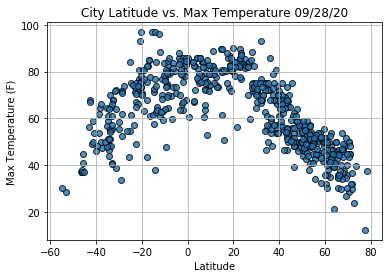

In [14]:
# Build the scatter plot for latitude vs. temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

## Plot Latitude vs. Humidity

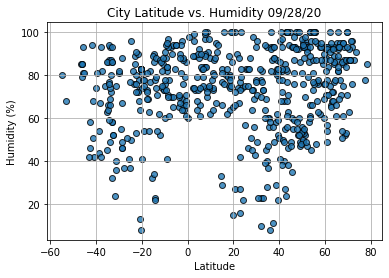

In [15]:
# Build the scatter plot for Latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

## Plot Latitude vs. Cloudiness

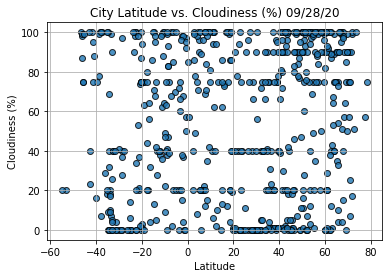

In [16]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

## Plot Latitude vs. Wind Speed

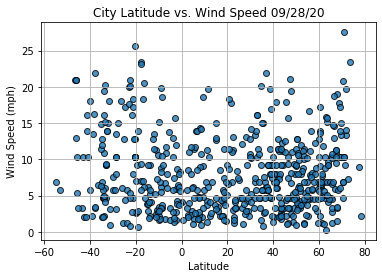

In [17]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

# Linear Regression Function

In [18]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [19]:
index13 = city_data_df.loc[13]
index13

City                       Albany
Country                        US
Date          2020-09-29 03:48:29
Lat                          42.6
Lng                        -73.97
Max Temp                    69.01
Humidity                       85
Cloudiness                      2
Wind Speed                   7.76
Name: 13, dtype: object

In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

## Correlation Between Latitude and Maximum Temperature

### Linear Regression on the Maximum Temperature for the Northern Hemisphere

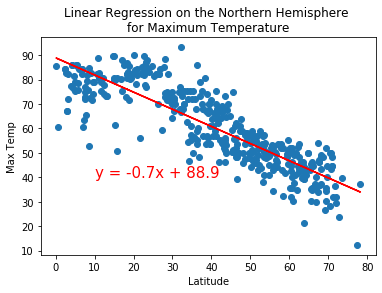

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(10,40))

### Linear Regression on the Maximum Temperature for the Southern Hemisphere

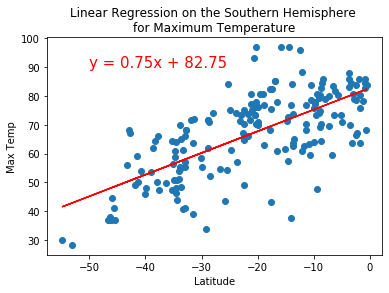

In [22]:
# Linear regression on the Southern Hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp', (-50,90))

## Correlation Between Latitude and Percent Humidity

### Linear Regression on the % Humidity for the Nothern Hemisphere

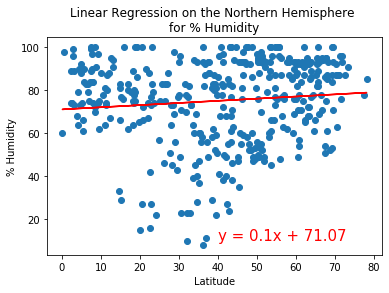

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

### Linear Regression on the % Humidity for the Southern Hemisphere


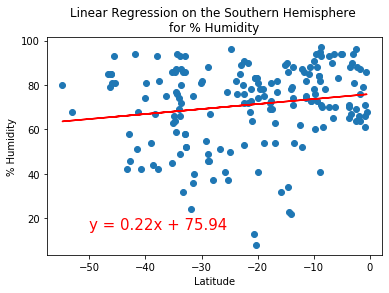

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

## Correlation Between Latitude and Percent Cloudiness

### Linear Regression on the % Cloudiness for the Northern Hemisphere

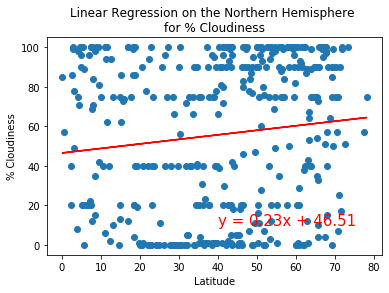

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(40,10))

### Linear Regression on the % Cloudiness for the Southern Hemisphere

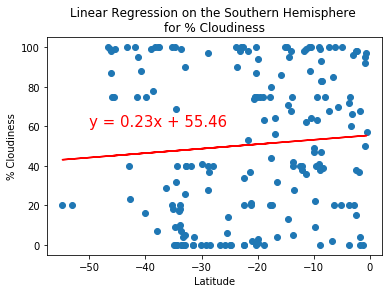

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

## Correlation Between Latitude and Wind Speed

### Linear Regression on the Wind Speed for the Northern Hemisphere

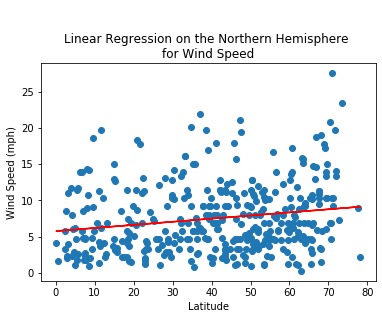

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed (mph)',(40,35))

### Linear Regression on the Wind Speed for the Southern Hemisphere

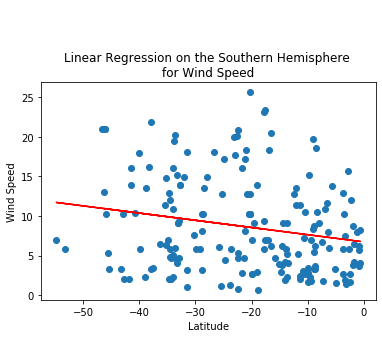

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,35))

# Create heatmaps Weather Parameters

In [29]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)

## Maximum Temperature Heatmap

In [33]:
# Heatmap of maximum temperature
locations = city_data_df[["Lat", "Lng"]]
temps = city_data_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=temps, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
#Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

## Percent Humidity Heatmap

In [32]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
#Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

## Percent Cloudiness Heatmap

In [34]:
# Heatmap of percent cloudiness
locations = city_data_df[["Lat", "Lng"]]
clouds = city_data_df["Cloudiness"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=clouds, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
#Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

## Wind Speed Heatmap

In [35]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
wind = city_data_df["Wind Speed"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=wind, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
#Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))